In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Import the packages needed
import seaborn as sns

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
import math
import io

In [ ]:
# Load the MI complication dataset
df = pd.read_csv("/content/gdrive/MyDrive/MI_Paper/Myocardial_infarction_complications_Database.csv")

# **1. Remove features with significant missingness (>25%)**

In [ ]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'index': range(1, len(df.columns)+1),
                                'column_name': df.columns,
                                 'percent_missing': percent_missing})
original_columns = df.columns.copy()
print("Total percent of missing values:", df.isnull().sum().sum()/len(df))

Total percent of missing values: 9.396470588235294


In [ ]:
# Removing features with more than 25 percent missing values
df2 = df.copy()
print("Number of columns originally:", len(df2.columns))
percent_missing = df2.isnull().sum() * 100 / len(df2)
new = []
for i in range(len(df.columns)):
    if percent_missing[i] > 25:
        new.append(i)

df2.drop(df2.columns[new], axis=1, inplace=True)
print("Number of columns after cleaning:", len(df2.columns))
print("Total percent of missing values:", df2.isnull().sum().sum()/len(df2))
percent_missing = df2.isnull().sum() * 100 / len(df2)
missing_value_df2 = pd.DataFrame({'index': range(1, len(df2.columns)+1),
                                'column_name': df2.columns,
                                 'percent_missing': percent_missing})
print("Features excluded are: \n", original_columns[new])

Number of columns originally: 124
Number of columns after cleaning: 117
Total percent of missing values: 4.987058823529412
Features excluded are: 
 Index(['IBS_NASL', 'S_AD_KBRIG', 'D_AD_KBRIG', 'KFK_BLOOD', 'NA_KB',
       'NOT_NA_KB', 'LID_KB'],
      dtype='object')


In [ ]:
#df2.to_csv("/content/gdrive/MyDrive/MI_Paper/1_Imputed/df2.csv", header=True)

# **2. Feature selection**

In [ ]:
#df2 = pd.read_csv("/content/gdrive/MyDrive/MI_Paper/1_Imputed/df2.csv")
#df2 = df2.reset_index()

In [ ]:
# Import packages needed to run this section of the notebook
%%capture
!pip install probatus==1.8.4
!pip install lightgbm==3.2.1

from probatus.feature_elimination import ShapRFECV, EarlyStoppingShapRFECV
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import lightgbm

In [ ]:
df2.head()

,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,SIM_GIPERT,DLIT_AG,ZSN_A,nr_11,nr_01,nr_02,nr_03,nr_04,nr_07,nr_08,np_01,np_04,np_05,np_07,np_08,np_09,np_10,endocr_01,endocr_02,endocr_03,zab_leg_01,zab_leg_02,zab_leg_03,zab_leg_04,zab_leg_06,S_AD_ORIT,D_AD_ORIT,O_L_POST,K_SH_POST,MP_TP_POST,SVT_POST,GT_POST,...,fibr_ter_07,fibr_ter_08,GIPO_K,K_BLOOD,GIPER_NA,NA_BLOOD,ALT_BLOOD,AST_BLOOD,L_BLOOD,ROE,TIME_B_S,R_AB_1_n,R_AB_2_n,R_AB_3_n,NITR_S,NA_R_1_n,NA_R_2_n,NA_R_3_n,NOT_NA_1_n,NOT_NA_2_n,NOT_NA_3_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n,FIBR_PREDS,PREDS_TAH,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,1,77.0,1,2.0,1.0,1.0,2.0,3.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,180.0,100.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.7,0.0,138.0,NaN,NaN,8.0,16.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120.0,90.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,3.5,0.0,132.0,0.38,0.18,7.8,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,52.0,1,0.0,0.0,0.0,2.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,180.0,100.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,132.0,0.30,0.11,10.8,NaN,3.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,2.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,68.0,0,0.0,0.0,0.0,2.0,2.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,120.0,70.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,3.9,0.0,146.0,0.75,0.37,NaN,NaN,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,1,0,0,0
4,5,60.0,1,0.0,0.0,0.0,2.0,3.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,160.0,90.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,3.5,0.0,132.0,0.45,0.22,8.3,NaN,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
feature_names = df2.columns[1:105].tolist()
predictions = df2.iloc[:, 105:]
y = np.array(predictions)
X = np.array(df2.iloc[:, 1:105])

label1 = []
label2 = []
label3 = []
label4 = []
label5 = []
label6 = []
label7 = []
label8 = []
label9 = []
label10 = []
label11 = []
label12 = []

labels = [label1, label2, label3, label4, label5, label6, label7, label8, label9, label10, label11, label12]
print(feature_names)

['AGE', 'SEX', 'INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'IBS_POST', 'GB', 'SIM_GIPERT', 'DLIT_AG', 'ZSN_A', 'nr_11', 'nr_01', 'nr_02', 'nr_03', 'nr_04', 'nr_07', 'nr_08', 'np_01', 'np_04', 'np_05', 'np_07', 'np_08', 'np_09', 'np_10', 'endocr_01', 'endocr_02', 'endocr_03', 'zab_leg_01', 'zab_leg_02', 'zab_leg_03', 'zab_leg_04', 'zab_leg_06', 'S_AD_ORIT', 'D_AD_ORIT', 'O_L_POST', 'K_SH_POST', 'MP_TP_POST', 'SVT_POST', 'GT_POST', 'FIB_G_POST', 'ant_im', 'lat_im', 'inf_im', 'post_im', 'IM_PG_P', 'ritm_ecg_p_01', 'ritm_ecg_p_02', 'ritm_ecg_p_04', 'ritm_ecg_p_06', 'ritm_ecg_p_07', 'ritm_ecg_p_08', 'n_r_ecg_p_01', 'n_r_ecg_p_02', 'n_r_ecg_p_03', 'n_r_ecg_p_04', 'n_r_ecg_p_05', 'n_r_ecg_p_06', 'n_r_ecg_p_08', 'n_r_ecg_p_09', 'n_r_ecg_p_10', 'n_p_ecg_p_01', 'n_p_ecg_p_03', 'n_p_ecg_p_04', 'n_p_ecg_p_05', 'n_p_ecg_p_06', 'n_p_ecg_p_07', 'n_p_ecg_p_08', 'n_p_ecg_p_09', 'n_p_ecg_p_10', 'n_p_ecg_p_11', 'n_p_ecg_p_12', 'fibr_ter_01', 'fibr_ter_02', 'fibr_ter_03', 'fibr_ter_05', 'fibr_ter_06', 'fibr_ter

In [ ]:
df2.iloc[:, 105:].isnull().sum()

FIBR_PREDS    0
PREDS_TAH     0
JELUD_TAH     0
FIBR_JELUD    0
A_V_BLOK      0
OTEK_LANC     0
RAZRIV        0
DRESSLER      0
ZSN           0
REC_IM        0
P_IM_STEN     0
LET_IS        0
dtype: int64

In [ ]:
# Handles categorical and missing values
clf = lightgbm.LGBMClassifier(n_estimators=200, max_depth=3)

# Indices of columns to remove for each label due to leakiness
indices = [[36, 46, 55, 56], [37, 49, 57], [38, 49, 58], [39, 59], [64], [34], [], [], [], [40, 41, 42, 43, 44], [], []]

shap_elimination = {}
report = {}

for i in range(y.shape[1]-1):
        shap_elimination[i] = EarlyStoppingShapRFECV(clf, step=0.1, scoring='roc_auc', eval_metric='auc', early_stopping_rounds=5)
        Xf = np.delete(X, indices[i], axis=1)
        report[i] = shap_elimination[i].fit_compute(Xf, y[:,i], check_additivity=False)
        #print('Done')

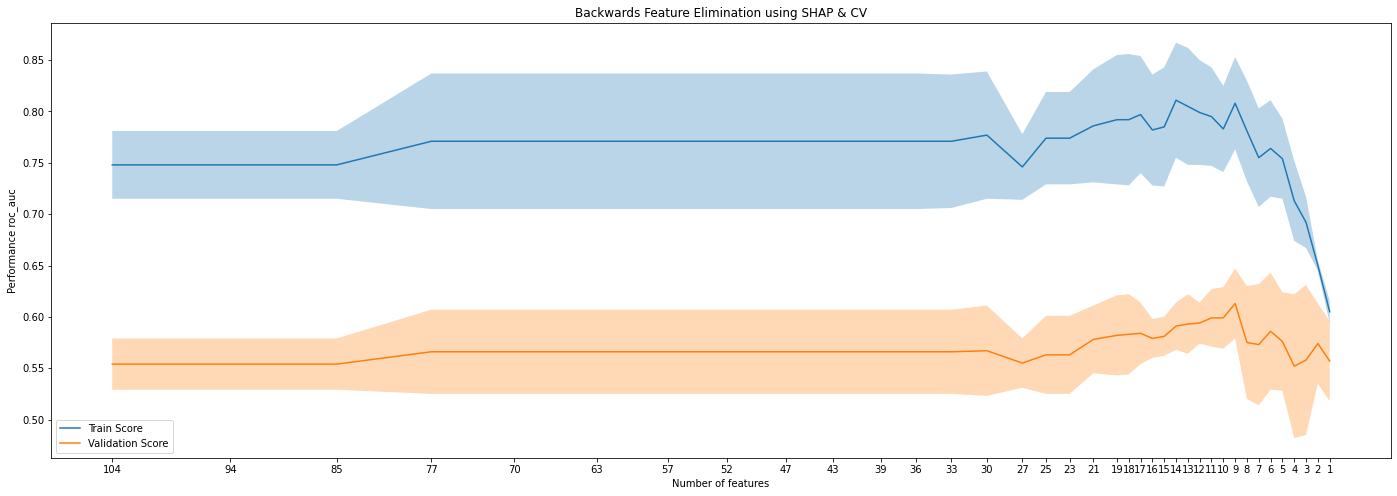

In [ ]:
# Make plots
performance_plot = shap_elimination[10].plot(figsize=(24, 8), show=True)

# Get final feature set
final_features_set = shap_elimination[1].get_reduced_features_set(num_features=22)

In [ ]:
print([feature_names[i] for i in final_features_set])

# Get the most impactful features for all
final_features_set0 = shap_elimination[0].get_reduced_features_set(num_features=16)
final_features_set1 = shap_elimination[1].get_reduced_features_set(num_features=17)
final_features_set2 = shap_elimination[2].get_reduced_features_set(num_features=8)
final_features_set3 = shap_elimination[3].get_reduced_features_set(num_features=18)
final_features_set4 = shap_elimination[4].get_reduced_features_set(num_features=14)
final_features_set5 = shap_elimination[5].get_reduced_features_set(num_features=14)
final_features_set6 = shap_elimination[6].get_reduced_features_set(num_features=7)
final_features_set7 = shap_elimination[7].get_reduced_features_set(num_features=7)
final_features_set8 = shap_elimination[8].get_reduced_features_set(num_features=19)
final_features_set9 = shap_elimination[9].get_reduced_features_set(num_features=7)
final_features_set10 = shap_elimination[10].get_reduced_features_set(num_features=9)

final_features_set = final_features_set0 + final_features_set1 + final_features_set2 + final_features_set3 + final_features_set4 + final_features_set5 + final_features_set6 + final_features_set7 + final_features_set8 + final_features_set9 + final_features_set10
features = [feature_names[i] for i in final_features_set]

['AGE', 'SIM_GIPERT', 'DLIT_AG', 'nr_11', 'fibr_ter_07', 'nr_04', 'GIPO_K', 'K_BLOOD', 'NA_BLOOD', 'ALT_BLOOD', 'np_05', 'AST_BLOOD', 'ROE', 'TIME_B_S', 'endocr_01', 'R_AB_2_n', 'NA_R_2_n', 'S_AD_ORIT', 'D_AD_ORIT', 'O_L_POST', 'inf_im', 'n_r_ecg_p_08']


In [ ]:
values, counts = np.unique(features, return_counts=True)
print("Number of features:", len(values))
labels_histogram = dict(zip(values, counts))
labels_histogram = dict(sorted(labels_histogram.items(), key=lambda x:x[1]))
print("Overall for all labels:")
for item in labels_histogram:
     print (item, labels_histogram[item])

Number of features: 57
Overall for all labels:
B_BLOK_S_n 1
FIB_G_POST 1
GB 1
LID_S_n 1
MP_TP_POST 1
NA_R_1_n 1
NOT_NA_1_n 1
NOT_NA_2_n 1
O_L_POST 1
SEX 1
SIM_GIPERT 1
ZSN_A 1
fibr_ter_01 1
fibr_ter_08 1
n_p_ecg_p_11 1
n_p_ecg_p_12 1
n_r_ecg_p_01 1
n_r_ecg_p_08 1
n_r_ecg_p_09 1
n_r_ecg_p_10 1
nr_03 1
post_im 1
ritm_ecg_p_02 1
ritm_ecg_p_04 1
ritm_ecg_p_06 1
ritm_ecg_p_07 1
zab_leg_01 1
zab_leg_02 1
D_AD_ORIT 2
INF_ANAM 2
NA_R_2_n 2
R_AB_1_n 2
R_AB_2_n 2
endocr_01 2
fibr_ter_07 2
inf_im 2
lat_im 2
nr_11 2
DLIT_AG 3
FK_STENOK 3
GIPER_NA 3
NA_R_3_n 3
NITR_S 3
R_AB_3_n 3
TIME_B_S 3
GIPO_K 4
ROE 4
STENOK_AN 4
ant_im 4
ALT_BLOOD 5
IBS_POST 5
K_BLOOD 5
AST_BLOOD 6
L_BLOOD 7
NA_BLOOD 7
S_AD_ORIT 7
AGE 9


In [ ]:
# Features to use for imputation
print("Featues to use in subsequent analysis:", values.tolist())
label = df2.columns[107:].tolist()
all = values.tolist() + label

Featues to use in subsequent analysis: ['AGE', 'ALT_BLOOD', 'AST_BLOOD', 'B_BLOK_S_n', 'DLIT_AG', 'D_AD_ORIT', 'FIB_G_POST', 'FK_STENOK', 'GB', 'GIPER_NA', 'GIPO_K', 'IBS_POST', 'INF_ANAM', 'K_BLOOD', 'LID_S_n', 'L_BLOOD', 'MP_TP_POST', 'NA_BLOOD', 'NA_R_1_n', 'NA_R_2_n', 'NA_R_3_n', 'NITR_S', 'NOT_NA_1_n', 'NOT_NA_2_n', 'O_L_POST', 'ROE', 'R_AB_1_n', 'R_AB_2_n', 'R_AB_3_n', 'SEX', 'SIM_GIPERT', 'STENOK_AN', 'S_AD_ORIT', 'TIME_B_S', 'ZSN_A', 'ant_im', 'endocr_01', 'fibr_ter_01', 'fibr_ter_07', 'fibr_ter_08', 'inf_im', 'lat_im', 'n_p_ecg_p_11', 'n_p_ecg_p_12', 'n_r_ecg_p_01', 'n_r_ecg_p_08', 'n_r_ecg_p_09', 'n_r_ecg_p_10', 'nr_03', 'nr_11', 'post_im', 'ritm_ecg_p_02', 'ritm_ecg_p_04', 'ritm_ecg_p_06', 'ritm_ecg_p_07', 'zab_leg_01', 'zab_leg_02']


In [ ]:
df3 = df2.loc[:, all]
df3 = df3.reset_index(drop=True)
df3.describe()

,AGE,ALT_BLOOD,AST_BLOOD,B_BLOK_S_n,DLIT_AG,D_AD_ORIT,FIB_G_POST,FK_STENOK,GB,GIPER_NA,GIPO_K,IBS_POST,INF_ANAM,K_BLOOD,LID_S_n,L_BLOOD,MP_TP_POST,NA_BLOOD,NA_R_1_n,NA_R_2_n,NA_R_3_n,NITR_S,NOT_NA_1_n,NOT_NA_2_n,O_L_POST,ROE,R_AB_1_n,R_AB_2_n,R_AB_3_n,SEX,SIM_GIPERT,STENOK_AN,S_AD_ORIT,TIME_B_S,ZSN_A,ant_im,endocr_01,fibr_ter_01,fibr_ter_07,fibr_ter_08,inf_im,lat_im,n_p_ecg_p_11,n_p_ecg_p_12,n_r_ecg_p_01,n_r_ecg_p_08,n_r_ecg_p_09,n_r_ecg_p_10,nr_03,nr_11,post_im,ritm_ecg_p_02,ritm_ecg_p_04,ritm_ecg_p_06,ritm_ecg_p_07,zab_leg_01,zab_leg_02,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
count,1692.000000,1416.000000,1415.000000,1689.000000,1452.000000,1433.000000,1688.000000,1627.000000,1691.000000,1325.000000,1331.000000,1649.000000,1696.000000,1329.000000,1690.000000,1575.000000,1686.000000,1325.000000,1695.000000,1592.000000,1569.000000,1691.000000,1690.000000,1590.000000,1688.000000,1497.000000,1684.000000,1592.000000,1572.000000,1700.000000,1692.000000,1594.000000,1433.000000,1574.000000,1646.000000,1617.000000,1689.000000,1690.000000,1690.000000,1690.000000,1620.000000,1620.000000,1585.000000,1585.000000,1585.000000,1585.000000,1585.000000,1585.000000,1679.000000,1679.000000,1628.000000,1548.000000,1548.000000,1548.000000,1548.000000,1693.000000,1693.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000
mean,61.856974,0.481455,0.263717,0.127294,3.340220,82.749477,0.008886,1.205286,1.393258,0.022642,0.401202,1.160703,0.554835,4.191422,0.283432,8.782914,0.067616,136.550943,0.484956,0.094221,0.058636,0.115316,0.331953,0.113208,0.065166,13.444890,0.315914,0.140704,0.077608,0.626471,0.033688,2.316186,134.588276,4.684244,0.194411,1.570810,0.134991,0.007692,0.003550,0.001183,1.014815,0.861728,0.017666,0.049211,0.036593,0.002524,0.001262,0.001262,0.020846,0.025015,0.259214,0.061370,0.014858,0.000646,0.228036,0.079149,0.071471,0.024706,0.041765,0.033529,0.093529,0.031765,0.044118,0.231765,0.093529,0.087059,0.477059
std,11.259936,0.387261,0.201802,0.333401,3.098646,18.321063,0.093875,1.040814,1.088803,0.148814,0.490326,0.801400,0.836801,0.754076,0.450798,3.400557,0.251160,6.512120,0.779522,0.356203,0.275030,0.319498,0.628311,0.399514,0.246891,11.296316,0.633738,0.424340,0.313632,0.483883,0.180478,2.440586,31.348388,2.871044,0.658722,1.711952,0.341815,0.087394,0.059496,0.034391,1.404934,0.883249,0.131774,0.216377,0.187820,0.050188,0.035511,0.035511,0.142910,0.156217,0.698850,0.240084,0.121023,0.025416,0.419702,0.270052,0.257686,0.155273,0.200110,0.180067,0.291259,0.175425,0.205417,0.422084,0.291259,0.282004,1.381818
min,26.000000,0.030000,0.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.300000,0.000000,2.000000,0.000000,117.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,54.000000,0.230000,0.150000,0.000000,0.000000,80.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.700000,0.000000,6.400000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,120.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,63.000000,0.380000,0.220000,0.000000,3.000000,80.000000,0.000000,2.000000,2.000000,0.000000,0.000000,1.00000

In [ ]:
df3.to_csv("/content/gdrive/MyDrive/MI_Paper/4_Final_Dataset/Feature_selected.csv", index = False)